# Step 1: Problem Formulation

To formulate the problem, we first have to import the dike model. This file is named 'dike_model_function' and this simulates the whole chain of functions and files. This basically is the realtionships in the system (R). 

Secondly, the file 'problem_formulation_group6' is imported, in which the problem is formulated. It prepares the uncertainties (X), levers (L) and performance metrics (M). The table below specifies the ranges for the deeply uncertain factors: 

|Uncertainties	|Range	        |Unit|
|-----------|--------------:|------------:|
|Maximum breach height per location (Bmax)    	|30 – 350	|m         |
|Breach growth rate per location (Brate)	|(1, 1,5, 10)	|m       |
|Discount rate      	|(1.5, 2.5, 3.5, 4.5)	    |         |
|Probability of dike failure per location (pfail)	    |0 – 1	    |            |
|Flood wave shape	|0 – 140	|         |

The table below specifies the levers of the model:

|Levers	|Range	        |
|-----------|--------------:|
|Room for the River per location (RfR)    	|0-1	|
|Dike heightening per location	|0-10	|
|Early warning system (EWS)      	|0-4	    |

Within this file, the performance metrics is adjusted to the prefered outcomes of interests of this report. A 7-objective problem formulation is created, which gives different costs as output as well as the expected number of deaths for the geographical areas: Upstream Gelderland, Downstream Gelderland and Overijssel. The table below shows all objectives within the problem formulation:

|Performance metrics	|
|-----------|
|Expected annual damage   	|
|Dike investment costs	|
|RfR investment costs      	|
|Evacuation costs  	|
|Expected annual deaths per geographical area	|

### Importing relevant packages and initialise the model

In [1]:
# Import the relevant packages

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Set a coloscheme to generate consistent looking plots
colorscheme = "viridis"

In [2]:
# Import the EMA workbench packages needed to specify the problem formulation in this notebook. Also import the dike_model_function
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [3]:
# Import other relevant EMA workbench functions
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation_group6 import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [4]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [5]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [6]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=['A.1_Expected Annual Damage 0', 'A.2_Expected Annual Damage 0', 'A.3_Expected Annual Damage 0', 'A.4_Expected Annual Damage 0', 'A.5_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.2_Expected Annual Damage 1', 'A.3_Expected Annual Damage 1', 'A.4_Expected Annual Damage 1', 'A.5_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2', 'A.2_Expected Annual Damage 2', 'A.3_Expected Annual Damage 2', 'A.4_Expected Annual Damage 2', 'A.5_Expected Annual Damage 2'], function=<function sum_over at 0x7f9eed6098b0>)
ScalarOutcome('Dike Investment Costs', variable_name=['A.1_Dike Investment Costs 0', 'A.2_Dike Investment Costs 0', 'A.3_Dike Investment Costs 0', 'A.4_Dike Investment Costs 0', 'A.5_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.2_Dike Investment Costs 1', 'A.3_Dike Investment Costs 1', 'A.4_Dike Investment Costs 1', 'A.5_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2', 'A.2_Dike Investment 

### Running the model through EMA workbench
Running the model through the EMA workbench using SequentialEvaluator. This code creates just 2 experiments, but that is fine. The results are not used for analysis.

In [7]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with SequentialEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1, policies=2)

[MainProcess/INFO] performing 1 scenarios * 2 policies * 1 model(s) = 2 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 1 cases completed
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] experiments finished


In [8]:
#observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths Upstream Gelderland', 'Expected Number of Deaths Downstream Gelderland', 'Expected Number of Deaths Overijssel'])


A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                    106.0  184.050424        10   0.022324  101.303281   
1                    106.0  184.050424        10   0.022324  101.303281   

  A.2_Brate  A.2_pfail   A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0        10   0.485949  48.479404       1.5   0.066889  ...   
1        10   0.485949  48.479404       1.5   0.066889  ...   

   A.4_DikeIncrease 0 A.4_DikeIncrease 1  A.4_DikeIncrease 2  \
0                 2.0                7.0                 8.0   
1                 9.0                1.0                 4.0   

   A.5_DikeIncrease 0 A.5_DikeIncrease 1  A.5_DikeIncrease 2 EWS_DaysToThreat  \
0                 7.0                0.0                 8.0              1.0   
1                 0.0               10.0                 3.0              3.0   

  scenario policy     model  
0        0      0  dikesnet  
1        0      1  dikesnet  

[2 rows x 53 columns]

### Running and exploring Base case scenario
Now we are going to run the base case scenario, in which no policy measures are implemented. This is run for 5000 scenarios.

In [10]:
from ema_workbench import Policy

policies = [Policy('No_measures', **{'0_RfR 0':0, '0_RfR 1':0, '0_RfR 2':0, 'A.1_DikeIncrease 0':0, 'A.1_DikeIncrease 1':0, 'A.1_DikeIncrease 2':0,
                                     '1_RfR 0':0, '1_RfR 1':0, '1_RfR 2':0, 'A.2_DikeIncrease 0':0, 'A.2_DikeIncrease 1':0, 'A.2_DikeIncrease 2':0,
                                     '2_RfR 0':0, '2_RfR 1':0, '2_RfR 2':0, 'A.3_DikeIncrease 0':0, 'A.3_DikeIncrease 1':0, 'A.3_DikeIncrease 2':0,
                                     '3_RfR 0':0, '3_RfR 1':0, '3_RfR 2':0, 'A.4_DikeIncrease 0':0, 'A.4_DikeIncrease 1':0, 'A.4_DikeIncrease 2':0,
                                     '4_RfR 0':0, '4_RfR 1':0, '4_RfR 2':0, 'A.5_DikeIncrease 0':0, 'A.5_DikeIncrease 1':0, 'A.5_DikeIncrease 2':0, 'EWS_DaysToThreat':0})]

In [11]:
#pass the policies list to EMA workbench experiment runs
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)

n_scenarios = 5000
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 5000 scenarios * 1 policies * 1 model(s) = 5000 experiments
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1500 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 2500 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 3500 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 4500 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [24]:
#observing the simulation runs
experiments, outcomes = results
experiments
# experiments
# Statistical analysis for all policies

# pd.DataFrame(outcomes).describe()
# Statistical analysis per policy
outcomes_df = pd.DataFrame.from_dict(outcomes)
outcomes_df = pd.concat([experiments['policy'], outcomes_df], axis=1)
df_step1 = pd.DataFrame(outcomes_df).describe()

In [27]:
df_step1

Expected Annual Damage  Dike Investment Costs  RfR Investment Costs  \
count            5.000000e+03                 5000.0                5000.0   
mean             1.841441e+09                    0.0                   0.0   
std              1.338518e+09                    0.0                   0.0   
min              4.049679e+07                    0.0                   0.0   
25%              5.764515e+08                    0.0                   0.0   
50%              1.706289e+09                    0.0                   0.0   
75%              2.913746e+09                    0.0                   0.0   
max              6.612337e+09                    0.0                   0.0   

       Evacuation Costs  Expected Number of Deaths Upstream Gelderland  \
count            5000.0                                    5000.000000   
mean                0.0                                       0.941094   
std                 0.0                                       0.878972   
min                 0.0                                       0.000000   
25%                 0.0                                       0.118136   
50%                 0.0                                       0.547172   
75%                 0.0                                       2.019654   
max                 0.0                                       2.906304   

       Expected Number of Deaths Downstream Gelderland  \
count                                      5000.000000   
mean                                          0.752953   
std                                           1.234428   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.067329   
75%                                           0.913825   
max                                           3.780421   

       Expected Number of Deaths Overijssel  
count                           5000.000000  
mean                               0.055539  
std                                0.164409  
min                                0.000000  
25%                                0.000000  
50%                                0.000000  
75%                                0.000000  
max                                1.180085

The results of running the base case over 5000 scenario's shows that the number of casualties for three KPI's concerning expected deaths is way above the threshold set by the government. This implies that inspecting policy implementations is a viable thing to do.

In [25]:
df_step1.to_csv('step1_basecase_outcomes.csv')

In [26]:
total_df = pd.concat([experiments, outcomes_df], axis=1)
total_df

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                       128.0   36.816058         1   0.139926  244.433603   
1                         6.0  208.962534        10   0.701188  253.519273   
2                       115.0  143.916221        10   0.111616  154.844170   
3                        42.0  295.887153       1.5   0.823638  125.763699   
4                        62.0   98.720832        10   0.429793  331.572432   
...                       ...         ...       ...        ...         ...   
4995                    112.0  212.666446        10   0.092947  169.253361   
4996                     26.0  266.342953        10   0.835194  241.066497   
4997                    119.0   74.620132       1.5   0.216165  194.805921   
4998                     87.0  324.906273        10   0.411508  235.996755   
4999                    119.0  257.362038        10   0.989736  175.703968   

     A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...       policy  \
0           10   0.547043  202.136696       1.5   0.263293  ...  No_measures   
1           10   0.573721   73.061365         1   0.765097  ...  No_measures   
2          1.5   0.484066  129.280241         1   0.228597  ...  No_measures   
3           10   0.699582  340.603303       1.5   0.383502  ...  No_measures   
4            1   0.105609  167.158958         1   0.119683  ...  No_measures   
...        ...        ...         ...       ...        ...  ...          ...   
4995       1.5   0.411889   74.049407       1.5   0.098943  ...  No_measures   
4996         1   0.116605  219.155911         1   0.966436  ...  No_measures   
4997        10   0.526621  215.882443         1   0.510386  ...  No_measures   
4998       1.5   0.026372  178.212647         1   0.639841  ...  No_measures   
4999       1.5   0.398163  261.092544       1.5   0.722619  ...  No_measures   

         model       policy  Expected Annual Damage Dike Investment Costs  \
0     dikesnet  No_measures            2.891189e+09                     0   
1     dikesnet  No_measures            1.983365e+08                     0   
2     dikesnet  No_measures            2.651284e+09                     0   
3     dikesnet  No_measures            3.499101e+08                     0   
4     dikesnet  No_measures            3.551481e+09                     0   
...        ...          ...                     ...                   ...   
4995  dikesnet  No_measures            3.333652e+09                     0   
4996  dikesnet  No_measures            8.883012e+08                     0   
4997  dikesnet  No_measures            3.064678e+09                     0   
4998  dikesnet  No_measures            1.888711e+09                     0   
4999  dikesnet  No_measures            1.454887e+08                     0   

      RfR Investment Costs Evacuation Costs  \
0                      0.0              0.0   
1                      0.0              0.0   
2                      0.0              0.0   
3                      0.0              0.0   
4                      0.0              0.0   
...                    ...              ...   
4995                   0.0              0.0   
4996                   0.0              0.0   
4997                   0.0              0.0   
4998                   0.0              0.0   
4999                   0.0              0.0   

     Expected Number of Deaths Upstream Gelderland  \
0                                         2.056662   
1                                         0.066482   
2                                         1.996336   
3                                         0.032731   
4                                         1.180353   
...                                            ...   
4995                                      2.039486   
4996                                      0.569334   
4997                                      2.052565   
4998                                      1.531152   
4999                    

In [28]:
total_df.to_csv('step1_basecase_outcomes_experiments.csv')

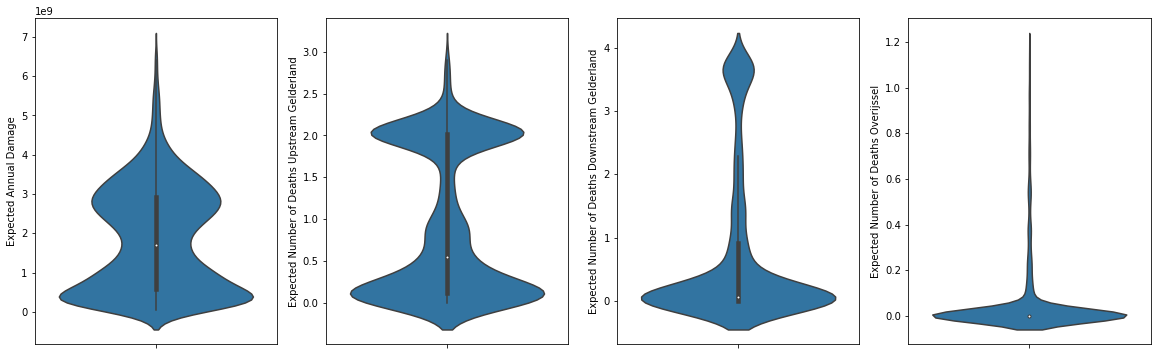

In [31]:
data = pd.DataFrame(outcomes)
fig, axs = plt.subplots(ncols=4, figsize = (20,6)) # Add sharey=True to have the same axis, makes more easy to visualize differences
sns.violinplot(data=outcomes_df, y='Expected Annual Damage', ax=axs[0])
sns.violinplot(data=outcomes_df, y='Expected Number of Deaths Upstream Gelderland', ax=axs[1])
sns.violinplot(data=outcomes_df, y='Expected Number of Deaths Downstream Gelderland', ax=axs[2])
sns.violinplot(data=outcomes_df, y='Expected Number of Deaths Overijssel', ax=axs[3])
plt.savefig('basecase.png')
plt.show()

As a more visual approach to analyzing the outcomes of interests, these violinplots were generated. These plots clearly indicate the distribution of the scenarios, in which is directly visible that the base case scenario results have a good possibility of a highly undesirable future situation. 

To conclude, analyzing the base case scenario, in which no policy measures are implemented, provides clarity about the seriousness of the situation and the need for better flood risk management. It also provides insight into the current safety of the various areas and this, in combination with the improvements of the found policy implementations, can be useful at a later stage in a fair distribution of costs.

In [ ]:
# Saving the results of Step 1 for the base case scenario
outcomes_df.to_csv('step1_basecase_outcomes.csv')

## Step 2: Searching for candidate solutions

In the second step of MORDM, candidate strategies are identified which are pareto optimal conditional on a reference scenario. These candiate strategies are identified through search with multi-objective evolutionary algorithms, that iteratively evaluate a large number of alternatives on multiple objectives until they find the best candidates. 

In [12]:
from ema_workbench.em_framework.optimization import (EpsilonProgress)

convergence_metrics = [EpsilonProgress()]

In [13]:
start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results2, convergence = evaluator.optimize(nfe=5e3, searchover='levers',
                                    convergence=convergence_metrics,
                                    epsilons=[1000,1000,1000,10,0.00001,0.00001,0.00001]
                                    )
end = time.time()
print('The hypervolume optimization took ' + str(round((end - start)/60)) + ' minutes')


[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/5000 nfe
[MainProcess/INFO] generation 5: 498/5000 nfe
[MainProcess/INFO] generation 10: 998/5000 nfe
[MainProcess/INFO] generation 15: 1493/5000 nfe
[MainProcess/INFO] generation 20: 1993/5000 nfe
[MainProcess/INFO] generation 25: 2489/5000 nfe
[MainProcess/INFO] generation 30: 2985/5000 nfe
[MainProcess/INFO] generation 35: 3483/5000 nfe
[MainProcess/INFO] generation 40: 3981/5000 nfe
[MainProcess/INFO] generation 45: 4479/5000 nfe
[MainProcess/INFO] generation 50: 4978/5000 nfe
[MainProcess/INFO] optimization completed, found 554 solutions
[MainProcess/INFO] terminating pool


The hypervolume optimization took 40 minutes


/Users/jeroenth/opt/anaconda3/lib/python3.8/site-packages/ema_workbench/analysis/parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


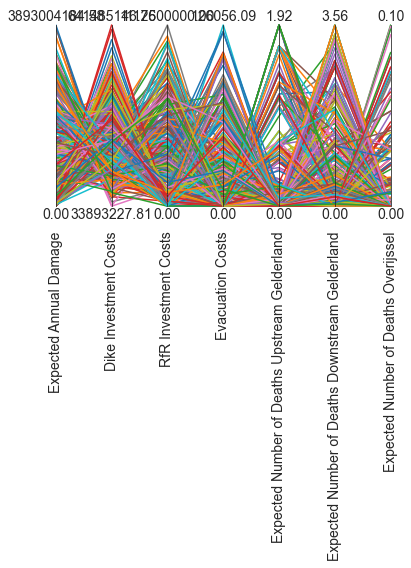

In [15]:
from ema_workbench.analysis import parcoords

outcomes = results2.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 
                           'Expected Number of Deaths Upstream Gelderland', 'Expected Number of Deaths Downstream Gelderland', 'Expected Number of Deaths Overijssel']]



limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)

plt.show()

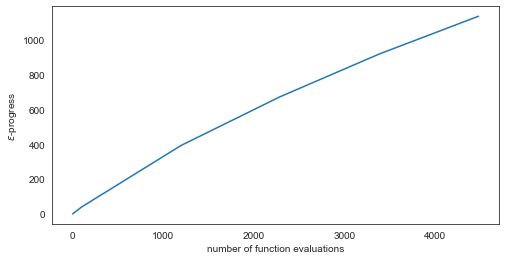

In [16]:
fig, (ax1) = plt.subplots(ncols=1, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')


ax1.set_xlabel('number of function evaluations')
plt.show()

In [18]:
# Save all pareto optimal solutions found
r = results2.iloc[:,7:]
r.to_csv('all_pareto_solutions.csv')

In [42]:
# Set constraints on the number of deaths and total costs to find optimal solutions
expected_number_of_deaths_constraint = 0.01
damage_costs_constraint = 5e8

d = results2.loc[:, 'Expected Number of Deaths Upstream Gelderland'].values + results2.loc[:, 'Expected Number of Deaths Downstream Gelderland'].values + results2.loc[:, 'Expected Number of Deaths Overijssel'].values
d = pd.DataFrame(d)
d = d[d[0] < expected_number_of_deaths_constraint]

r_1 = results2.loc[d.index.values.tolist(),:]
r_1['Total Investment Costs'] = r_1['Dike Investment Costs'] + r_1['RfR Investment Costs']
r_1 = r_1.drop(r_1[r_1['Total Investment Costs'] > damage_costs_constraint].index)
r_1

0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
8          0        0        0        0        0        0        0        0   
9          0        0        0        0        0        0        0        1   
67         0        0        0        0        0        0        0        0   
117        0        0        1        0        0        0        0        0   
127        0        0        0        0        0        0        0        0   
142        0        0        0        0        0        0        1        0   
195        1        0        0        0        0        0        0        0   
261        0        0        0        0        0        0        1        0   
314        0        0        0        0        0        0        1        0   
359        0        0        1        0        0        0        0        0   
398        0        0        0        0        0        0        0        0   

     2_RfR 2  3_RfR 0  ...  A.5_DikeIncrease 1  A.5_DikeIncrease 2  \
8          1        0  ...                   0                   0   
9          0        0  ...                   0                   1   
67         1        0  ...                   3                   3   
117        1        0  ...                   0                   0   
127        1        0  ...                   0                   0   
142        0        0  ...                   1                   0   
195        1        0  ...                   0                   0   
261        1        0  ...                   3                   3   
314        0        0  ...                   0                   0   
359        1        0  ...                   0                   0   
398        1        0  ...                   1                   3   

     Expected Annual Damage  Dike Investment Costs  RfR Investment Costs  \
8              5.229774e+06           4.633396e+08            30700000.0   
9              1.944882e+07           4.183634e+08            30700000.0   
67             5.916838e+06           4.677938e+08            30700000.0   
117            4.258288e+07           3.324931e+08           115300000.0   
127            5.827643e+07           3.433325e+08            30700000.0   
142            2.143174e+07           3.894001e+08            30700000.0   
195            3.594167e+07           3.453435e+08           115300000.0   
261            9.296981e+06           4.239567e+08            61400000.0   
314            4.380461e+07           3.186369e+08            30700000.0   
359            0.000000e+00           3.551949e+08           115300000.0   
398            2.324383e+07           3.892291e+08            30700000.0   

     Evacuation Costs  Expected Number of Deaths Upstream Gelderland  \
8            0.000000                                       0.001399   
9         1143.825551                                       0.002512   
67         154.817696                                       0.002361   
117       2767.783942                                       0.000000   
127       3278.252424                                       0.000336   
142       1177.968174                                       0.002679   
195       2179.664929                                       0.000620   
261        531.534638                                       0.000000   
314       2138.016221                                       0.002365   
359          0.000000                                       0.000000   
398        578.659000                                       0.003369   

     Expected Number of Deaths Downstream Gelderland  \
8                                           0.002440   
9                                           0.000000   
67                                          0.000000   
117                                         0.000117   
127                                         0.006483   
142                                         0.000000   
195                                         0

In [43]:
r_1.to_csv('generated_policies.csv')

In [44]:
df = pd.read_csv('generated_policies.csv')

In [45]:
df2 = pd.DataFrame()

In [46]:
df2['Policy'] = df['Unnamed: 0']
df2['Expected Annual Damage'] = df['Expected Annual Damage'] 
df2['Dike Investment Costs'] = df['Dike Investment Costs']
df2['RfR Investment Costs'] = df['RfR Investment Costs']
df2['Evacuation Costs'] = df['Evacuation Costs']
df2['Expected Number of Deaths Upstream Gelderland'] = df['Expected Number of Deaths Upstream Gelderland']
df2['Expected Number of Deaths Downstream Gelderland'] = df['Expected Number of Deaths Downstream Gelderland']
df2['Expected Number of Deaths Overijssel'] = df['Expected Number of Deaths Overijssel']

/Users/jeroenth/opt/anaconda3/lib/python3.8/site-packages/ema_workbench/analysis/parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


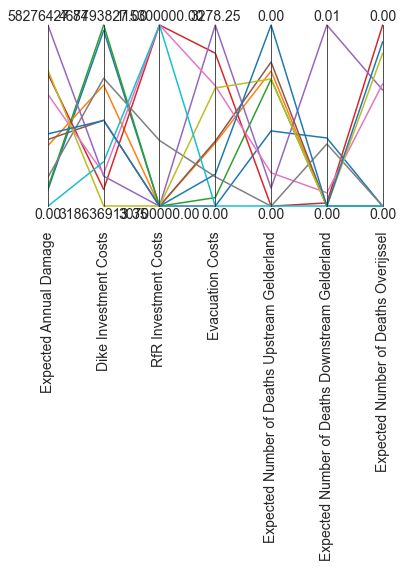

In [48]:
outcomes = df2.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 
                           'Expected Number of Deaths Upstream Gelderland', 'Expected Number of Deaths Downstream Gelderland', 'Expected Number of Deaths Overijssel']]

limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)

plt.show()

# Step 3: Uncertainty Analysis

In [66]:
r_1 = pd.read_csv('generated_policies.csv')

In [67]:
r_2 = r_1.drop([o.name for o in dike_model.outcomes], axis=1)
r_2 = r_2.drop('Total Investment Costs', 1)
r_2 = r_2.rename(columns={'Unnamed: 0': 'Policy Number'})
r_2

Policy Number  0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  \
0               8        0        0        0        0        0        0   
1               9        0        0        0        0        0        0   
2              67        0        0        0        0        0        0   
3             117        0        0        1        0        0        0   
4             127        0        0        0        0        0        0   
5             142        0        0        0        0        0        0   
6             195        1        0        0        0        0        0   
7             261        0        0        0        0        0        0   
8             314        0        0        0        0        0        0   
9             359        0        0        1        0        0        0   
10            398        0        0        0        0        0        0   

    2_RfR 0  2_RfR 1  2_RfR 2  ...  A.2_DikeIncrease 2  A.3_DikeIncrease 0  \
0         0        0        1  ...                   5                   8   
1         0        1        0  ...                   1                   7   
2         0        0        1  ...                   0                   7   
3         0        0        1  ...                   0                  10   
4         0        0        1  ...                   0                   4   
5         1        0        0  ...                   7                   7   
6         0        0        1  ...                   0                   6   
7         1        0        1  ...                   0                   5   
8         1        0        0  ...                   0                   6   
9         0        0        1  ...                   0                   8   
10        0        0        1  ...                   0                   7   

    A.3_DikeIncrease 1  A.3_DikeIncrease 2  A.4_DikeIncrease 0  \
0                    0                   4                   1   
1                    1                   3                   6   
2                    7                   4                   9   
3                    0                   1                   2   
4                    3                   1                   1   
5                    1                   0                   3   
6                    2                   0                   3   
7                    3                   7                   2   
8                    3                   4                   2   
9                    0                   3                   3   
10                   5                   4                   2   

    A.4_DikeIncrease 1  A.4_DikeIncrease 2  A.5_DikeIncrease 0  \
0                    8                   5                   5   
1                    6                   9                   5   
2                    0                   5                   2   
3                    5                   4                   1   
4                    3                   4                   1   
5                    2                   2                   2   
6                    6                   0                   2   
7                    1                   3                   5   
8                    2                   3                   2   
9                    5                   4                   3   
10                   3                   4                   1   

    A.5_DikeIncrease 1  A.5_DikeIncrease 2  
0                    0                   0  
1                    0                   1  
2                    3                   3  
3                    0                   0  
4                    0                   0  
5                    1                   0  
6                    0                   0  
7                    3                   3  
8                    0                   0  
9                    0                   0  
10                   1                   3  

[11 rows x 32 columns]

In [68]:
r_2.to_csv('policies_selection_step3.csv')

In [69]:
from ema_workbench import Policy

policies_to_evaluate = []

for i, policy in r_2.iterrows():
    policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [70]:
n_scenarios = 1000
with MultiprocessingEvaluator(dike_model) as evaluator:
    results3 = evaluator.perform_experiments(n_scenarios,
                                            policies_to_evaluate)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 11 policies * 1 model(s) = 11000 experiments
[MainProcess/INFO] 1100 cases completed
[MainProcess/INFO] 2200 cases completed
[MainProcess/INFO] 3300 cases completed
[MainProcess/INFO] 4400 cases completed
[MainProcess/INFO] 5500 cases completed
[MainProcess/INFO] 6600 cases completed
[MainProcess/INFO] 7700 cases completed
[MainProcess/INFO] 8800 cases completed
[MainProcess/INFO] 9900 cases completed
[MainProcess/INFO] 11000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [71]:
experiments3, outcomes3 = results3
experiments3
# experiments
# Statistical analysis for all policies
# pd.DataFrame(outcomes).describe()
# Statistical analysis per policy
outcomes_df = pd.DataFrame.from_dict(outcomes3)
outcomes_df = pd.concat([experiments['policy'], outcomes_df], axis=1)

scenarios = pd.DataFrame(outcomes_df)

In [72]:
scenarios.to_csv('scenarios.csv')

In [74]:
def s_to_n(data3, direction):
    mean = np.mean(data3)
    std = np.std(data3)
    
    if direction==ScalarOutcome.MAXIMIZE:
        return mean/std
    else:
        return mean*std

In [76]:
experiments3, outcomes3 = results3

overall_scores = {}
for policy in np.unique(experiments3['policy']):
    scores = {}
    
    logical = experiments3['policy']==policy
    
    for outcome in dike_model.outcomes:
        value  = outcomes3[outcome.name][logical]
        sn_ratio = s_to_n(value, outcome.kind)
        scores[outcome.name] = sn_ratio
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T
scores

Expected Annual Damage  Dike Investment Costs  RfR Investment Costs  \
0             5.143378e+15              55.234379                   0.0   
1             1.871857e+16              74.809203                   0.0   
10            3.611097e+16               0.000000                   0.0   
2             1.633575e+16              27.882685                   0.0   
3             4.742099e+16               0.000000                   0.0   
4             5.512282e+16              20.464209                   0.0   
5             3.512498e+16              23.210052                   0.0   
6             3.403765e+16              41.168152                   0.0   
7             1.651758e+15              25.269786                   0.0   
8             4.010025e+16               0.000000                   0.0   
9             1.371965e+16               0.000000                   0.0   

    Evacuation Costs  Expected Number of Deaths Upstream Gelderland  \
0       0.000000e+00                                       0.000850   
1       5.860669e+07                                       0.000167   
10      2.302639e+07                                       0.000788   
2       1.247801e+07                                       0.000862   
3       2.010600e+08                                       0.000014   
4       2.080503e+08                                       0.000025   
5       1.094087e+08                                       0.000145   
6       1.401457e+08                                       0.000085   
7       6.353435e+06                                       0.000005   
8       9.918674e+07                                       0.000213   
9       5.012003e+07                                       0.000005   

    Expected Number of Deaths Downstream Gelderland  \
0                                      7.184271e-05   
1                                      5.271234e-07   
10                                     8.891296e-06   
2                                      2.419998e-06   
3                                      3.117858e-07   
4                                      4.654983e-05   
5                                      1.494818e-06   
6                                      3.878100e-06   
7                                      4.578855e-06   
8                                      5.629538e-06   
9                                      5.481670e-07   

    Expected Number of Deaths Overijssel  
0                               0.001128  
1                               0.000010  
10                              0.001424  
2                               0.000343  
3                               0.000453  
4                               0.000416  
5                               0.000114  
6                               0.000207  
7                               0.000002  
8                               0.000288  
9                               0.000117

/Users/jeroenth/opt/anaconda3/lib/python3.8/site-packages/ema_workbench/analysis/parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


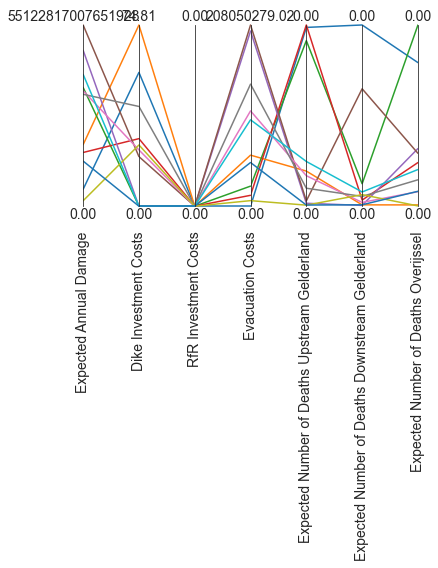

In [77]:
from ema_workbench.analysis import parcoords

data4 = scores
limits4 = parcoords.get_limits(data4)
limits4.loc[0, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 
                           'Expected Number of Deaths Upstream Gelderland', 'Expected Number of Deaths Downstream Gelderland', 'Expected Number of Deaths Overijssel']] = 0

paraxes = parcoords.ParallelAxes(limits4)
paraxes.plot(data4)
#paraxes.invert_axis('max_P')
plt.show()

In [78]:
def calculate_regret(data4, best):
    return np.abs(best-data4)

In [79]:
# experiments, outcomes = results

overall_regret = {}
max_regret = {}
for outcome in dike_model.outcomes:
    policy_column = experiments3['policy']
    
    # create a DataFrame with all the relevent information
    # i.e., policy, scenario_id, and scores
    data5 = pd.DataFrame({outcome.name: outcomes3[outcome.name], 
                         "policy":experiments3['policy'],
                         "scenario":experiments3['scenario']})
    
    # reorient the data by indexing with policy and scenario id
    data5 = data5.pivot(index='scenario', columns='policy')
    
    # flatten the resulting hierarchical index resulting from 
    # pivoting, (might be a nicer solution possible)
    data5.columns = data5.columns.get_level_values(1)
    
    # we need to control the broadcasting. 
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value
    #
    # basically we take the difference of the maximum across 
    # the row and the actual values in the row
    #
    outcome_regret = (data5.max(axis=1)[:, np.newaxis] - data5).abs()
    
    overall_regret[outcome.name] = outcome_regret
    max_regret[outcome.name] = outcome_regret.max()

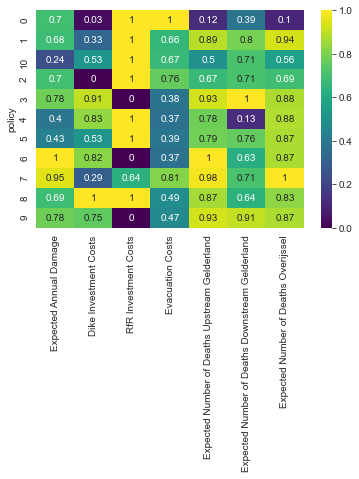

In [80]:
max_regret = pd.DataFrame(max_regret)
sns.heatmap(max_regret/max_regret.max(), cmap='viridis', annot=True)
plt.show()

/Users/jeroenth/opt/anaconda3/lib/python3.8/site-packages/ema_workbench/analysis/parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


IndexError: list index out of range

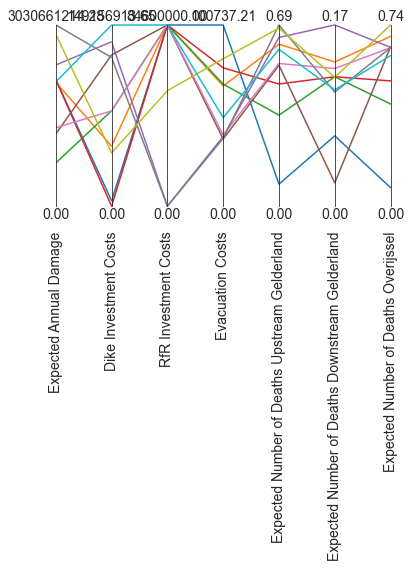

In [81]:
colors = sns.color_palette()

data6 = max_regret

# makes it easier to identify the policy associated with each line
# in the parcoords plot
# data['policy'] = data.index.astype("float64")

limits5 = parcoords.get_limits(data6)
limits5.loc[0, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 
                           'Expected Number of Deaths Upstream Gelderland', 'Expected Number of Deaths Downstream Gelderland', 'Expected Number of Deaths Overijssel']] = 0

paraxes = parcoords.ParallelAxes(limits5)
for i, (index, row) in enumerate(data6.iterrows()):
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])
paraxes.legend()
    
plt.show()

In [82]:
from collections import defaultdict

policy_regret = defaultdict(dict)
for key, value in overall_regret.items():
    for policy in value:
        policy_regret[policy][key] = value[policy]

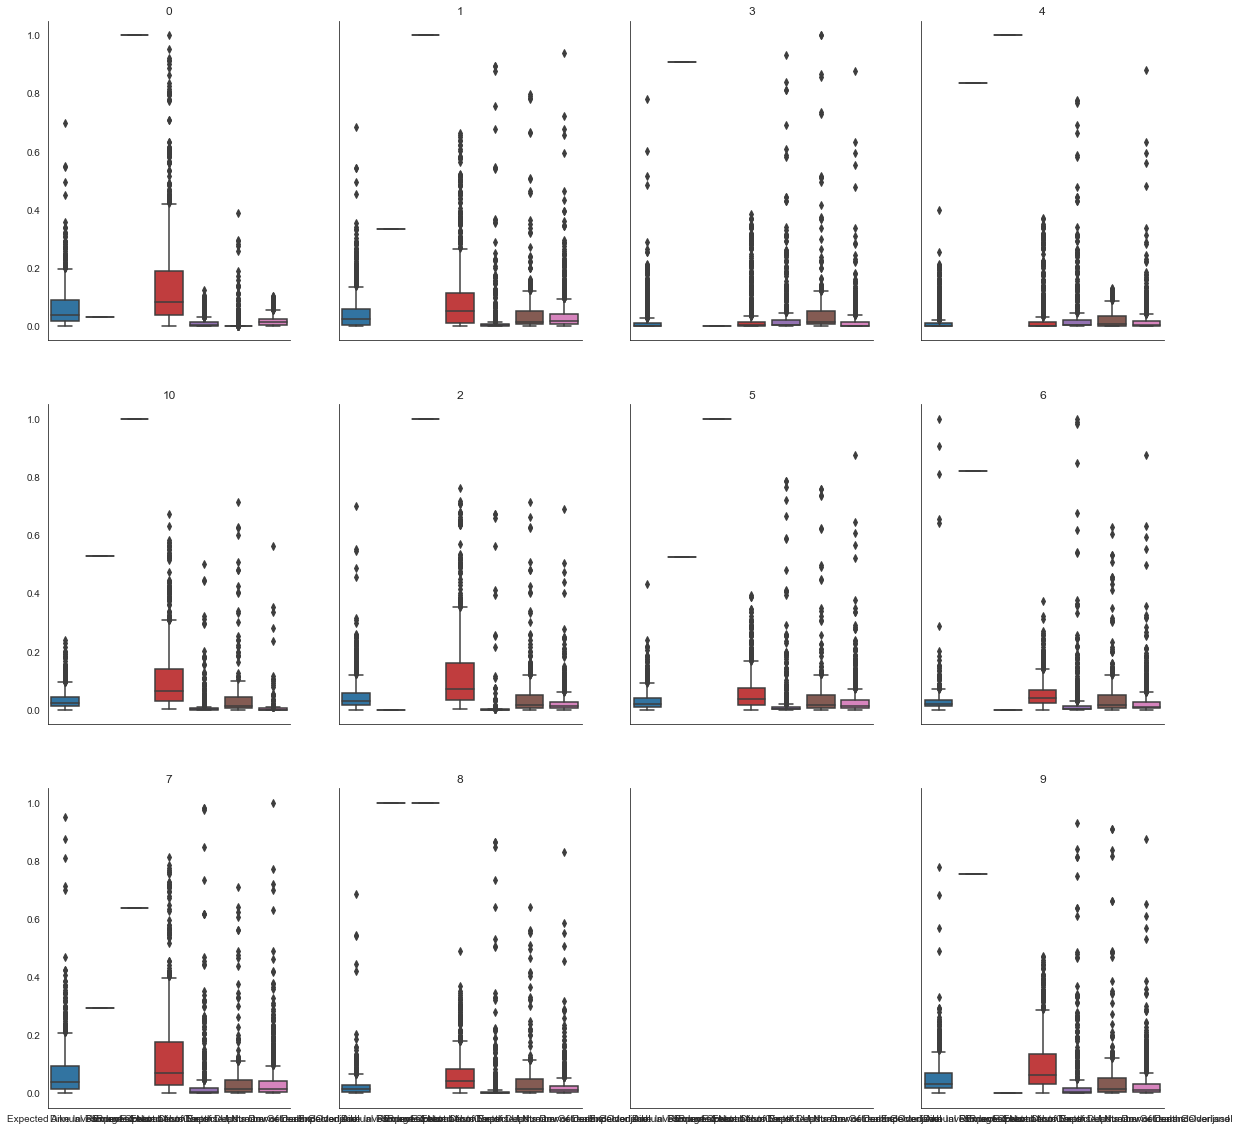

In [84]:
# this generates a 2 by 2 axes grid, with a shared X and Y axis
# accross all plots
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20,20), 
                         sharey=True, sharex=True)

# to ensure easy iteration over the axes grid, we turn it
# into a list. Because there are four plots, I hard coded
# this. 
axes = [axes[0,0], axes[0,1],
        axes[1,0],axes[1,1],
        axes[0,2],axes[0,3],
        axes[1,2],axes[1,3],
        axes[2,0],axes[2,1],
        axes[2,3]]

# zip allows us to zip together the list of axes and the list of 
# key value pairs return by items. If we iterate over this
# it returns a tuple of length 2. The first item is the ax
# the second items is the key value pair.
for ax, (policy, regret) in zip(axes, policy_regret.items()):
    data7 = pd.DataFrame(regret)

    # we need to scale the regret to ensure fair visual
    # comparison. We can do that by divding by the maximum regret
    data7 = data7/max_regret.max(axis=0)
    sns.boxplot(data=data7, ax=ax)
    
    # removes top and left hand black outline of axes
    sns.despine()
    
    # ensure we know which policy the figure is for
    ax.set_title(str(policy))
plt.show()

# Step 4: Scenario Discovery

#### Drop the policies and the levers

In [85]:
experiments_SD = experiments3.iloc[:, :19]

In [195]:
experiments_SD['Policy Number'] = experiments3['Policy Number']

In [215]:
experiments_SD['Policy Number'].unique()

array([  8.,   9.,  67., 117., 127., 142., 195., 261., 314., 359., 398.])

In [196]:
experiments_SD

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                         10.0  102.776318         1   0.582095  297.721734   
1                          8.0   64.670936       1.5   0.116398   39.600413   
2                         69.0  164.651084        10   0.344263  151.061396   
3                         84.0  216.382904         1   0.244349  162.713614   
4                         75.0  284.095568         1   0.632721  298.053206   
...                        ...         ...       ...        ...         ...   
10995                    120.0   65.027776       1.5   0.768756  315.959669   
10996                     42.0   84.149074         1   0.237994  207.539370   
10997                    128.0  186.824347        10   0.725475   92.993568   
10998                    105.0   90.985366        10   0.062978  136.524184   
10999                     47.0  315.069122        10   0.242561   32.384655   

      A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail    A.4_Bmax  \
0             1   0.295520  257.359673       1.5   0.119982  131.851210   
1           1.5   0.788363   71.635326       1.5   0.201981  322.579677   
2             1   0.716262  225.351670        10   0.024552  301.720392   
3             1   0.955654  319.479164         1   0.494850  294.606350   
4           1.5   0.298630  219.564385       1.5   0.303698  293.408086   
...         ...        ...         ...       ...        ...         ...   
10995         1   0.344262  110.933092        10   0.966672  124.003710   
10996        10   0.475991  305.996279         1   0.814929   48.713801   
10997       1.5   0.967965  303.678076        10   0.487800  218.707768   
10998         1   0.032785   97.171950       1.5   0.375134  240.434539   
10999       1.5   0.852273  253.132655       1.5   0.963855   84.903831   

      A.4_Brate  A.4_pfail    A.5_Bmax A.5_Brate  A.5_pfail discount rate 0  \
0             1   0.150390  320.687536        10   0.963108             4.5   
1           1.5   0.548048   65.582284        10   0.011823             4.5   
2            10   0.286677   31.400537        10   0.351063             3.5   
3            10   0.518585  103.268159        10   0.413444             2.5   
4            10   0.719815  244.036412         1   0.173200             3.5   
...         ...        ...         ...       ...        ...             ...   
10995        10   0.219431  316.221487         1   0.316390             3.5   
10996        10   0.576445  292.968833       1.5   0.603766             2.5   
10997        10   0.497939   70.253833        10   0.722181             1.5   
10998        10   0.418650  112.942719       1.5   0.703582             2.5   
10999         1   0.979138  342.908411        10   0.893464             2.5   

      discount rate 1 discount rate 2  Policy Number  
0                 2.5             1.5            8.0  
1                 1.5             4.5            8.0  
2                 4.5             1.5            8.0  
3                 2.5             1.5            8.0  
4                 4.5             3.5            8.0  
...               ...             ...            ...  
10995             2.5             2.5          398.0  
10996             1.5             1.5          398.0  
10997             2.5             3.5          398.0  
10998             2.5             1.5          398.0  
10999             1.5             2.5          398.0  

[11000 rows x 20 columns]

# Step 4: Scenario Discovery

## PRIM: Total Deaths

In [197]:
outcomes3['Deaths Total'] = outcomes3['Expected Number of Deaths Upstream Gelderland'] + outcomes3['Expected Number of Deaths Downstream Gelderland'] + outcomes3['Expected Number of Deaths Overijssel']

In [198]:
from ema_workbench.analysis import prim

data8 = outcomes3['Deaths Total']

y = data8 < np.percentile(data8, 25)

prim_alg = prim.Prim(experiments_SD,y, threshold=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 11000 points remaining, containing 2749 cases of interest
[MainProcess/INFO] mean: 0.8888888888888888, mass: 0.054, coverage: 0.19206984357948345, density: 0.8888888888888888 restricted_dimensions: 7


In [199]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

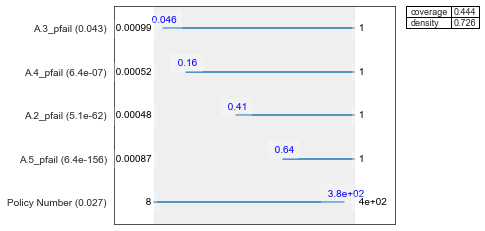

In [200]:
box1.inspect(35,style='graph')
plt.show()

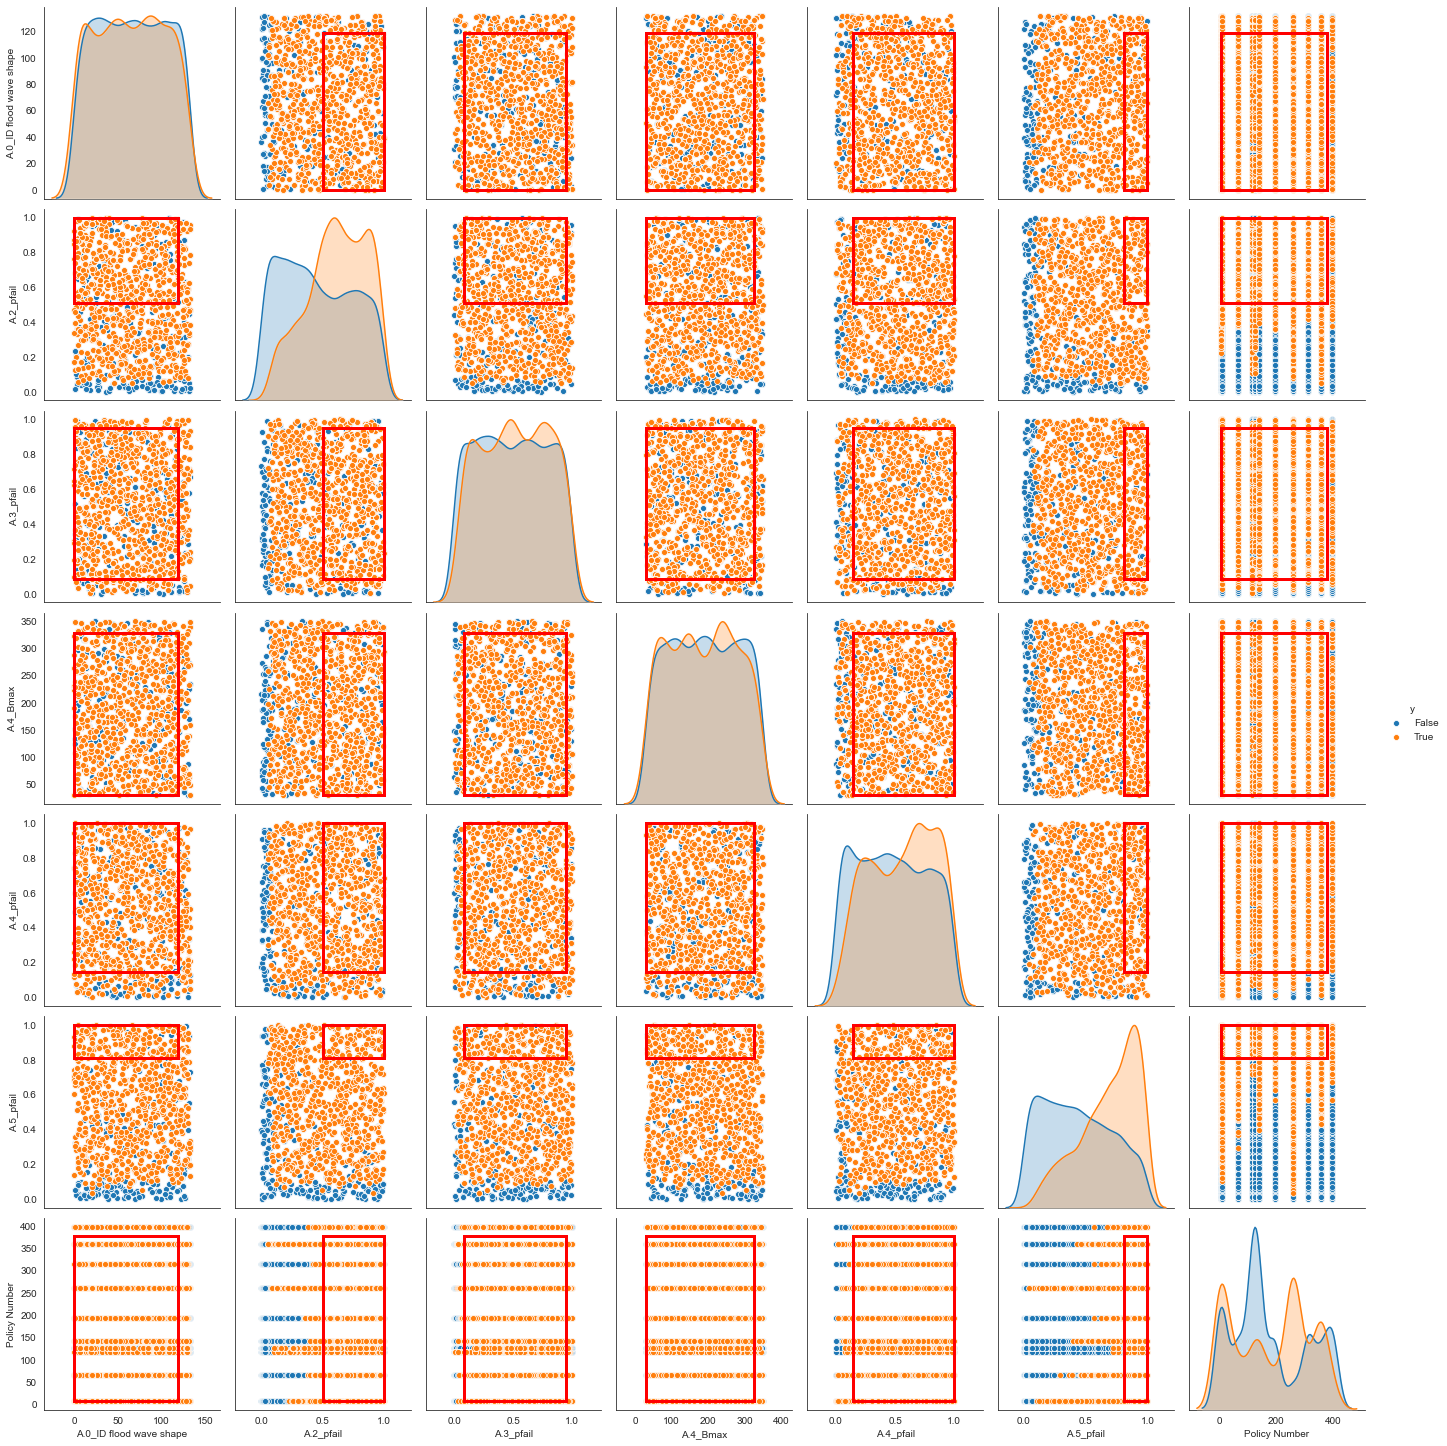

In [201]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

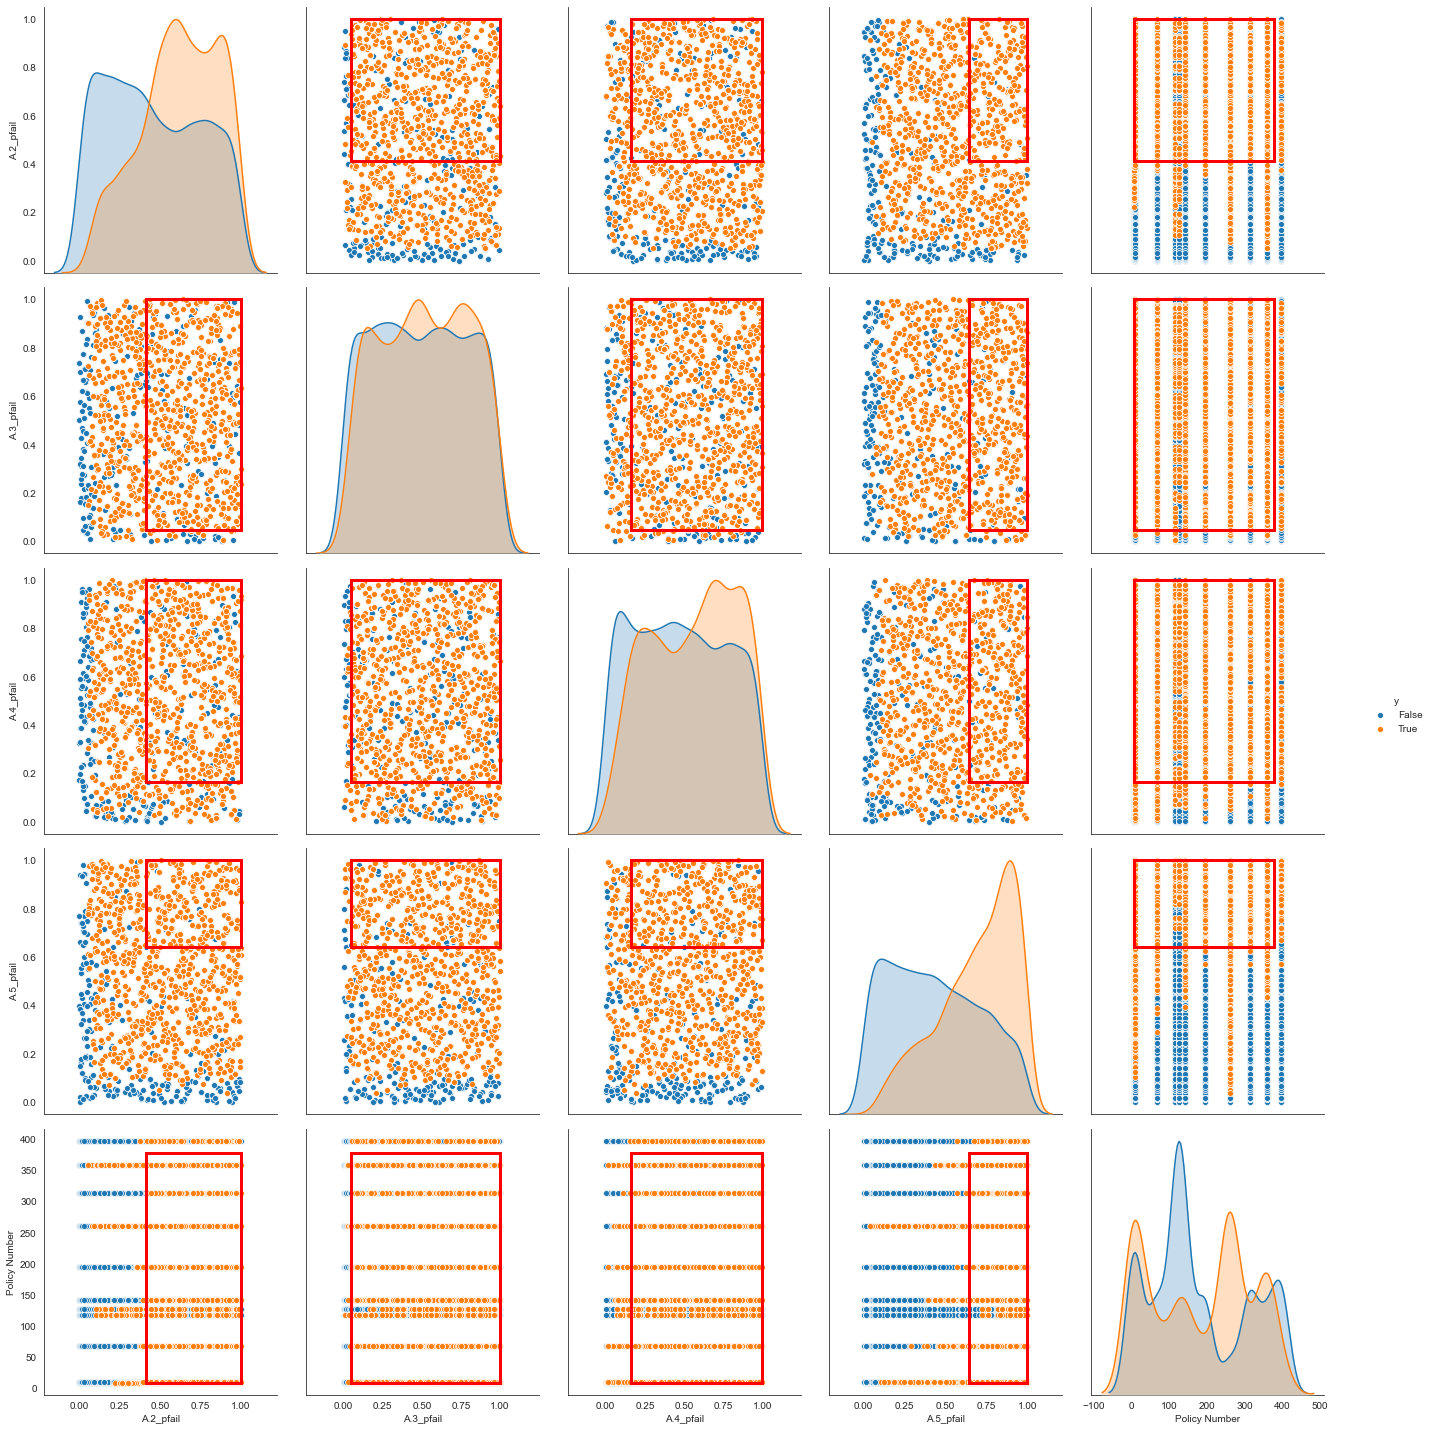

In [202]:
box1.select(35)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

## PRIM discovery: Annual Damage

In [207]:
data9 = outcomes3['Expected Annual Damage']

y = data9 < np.percentile(data9, 25)

prim_alg = prim.Prim(experiments_SD,y, threshold=0.1)
box2 = prim_alg.find_box()

[MainProcess/INFO] 11000 points remaining, containing 2750 cases of interest
[MainProcess/INFO] mean: 0.8734402852049911, mass: 0.051, coverage: 0.1781818181818182, density: 0.8734402852049911 restricted_dimensions: 8


In [208]:
box2.inspect_tradeoff()

alt.VConcatChart(...)

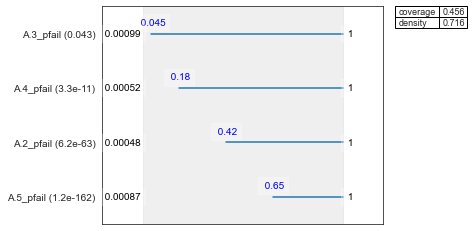

In [209]:
box2.inspect(35, style='graph')
plt.show()

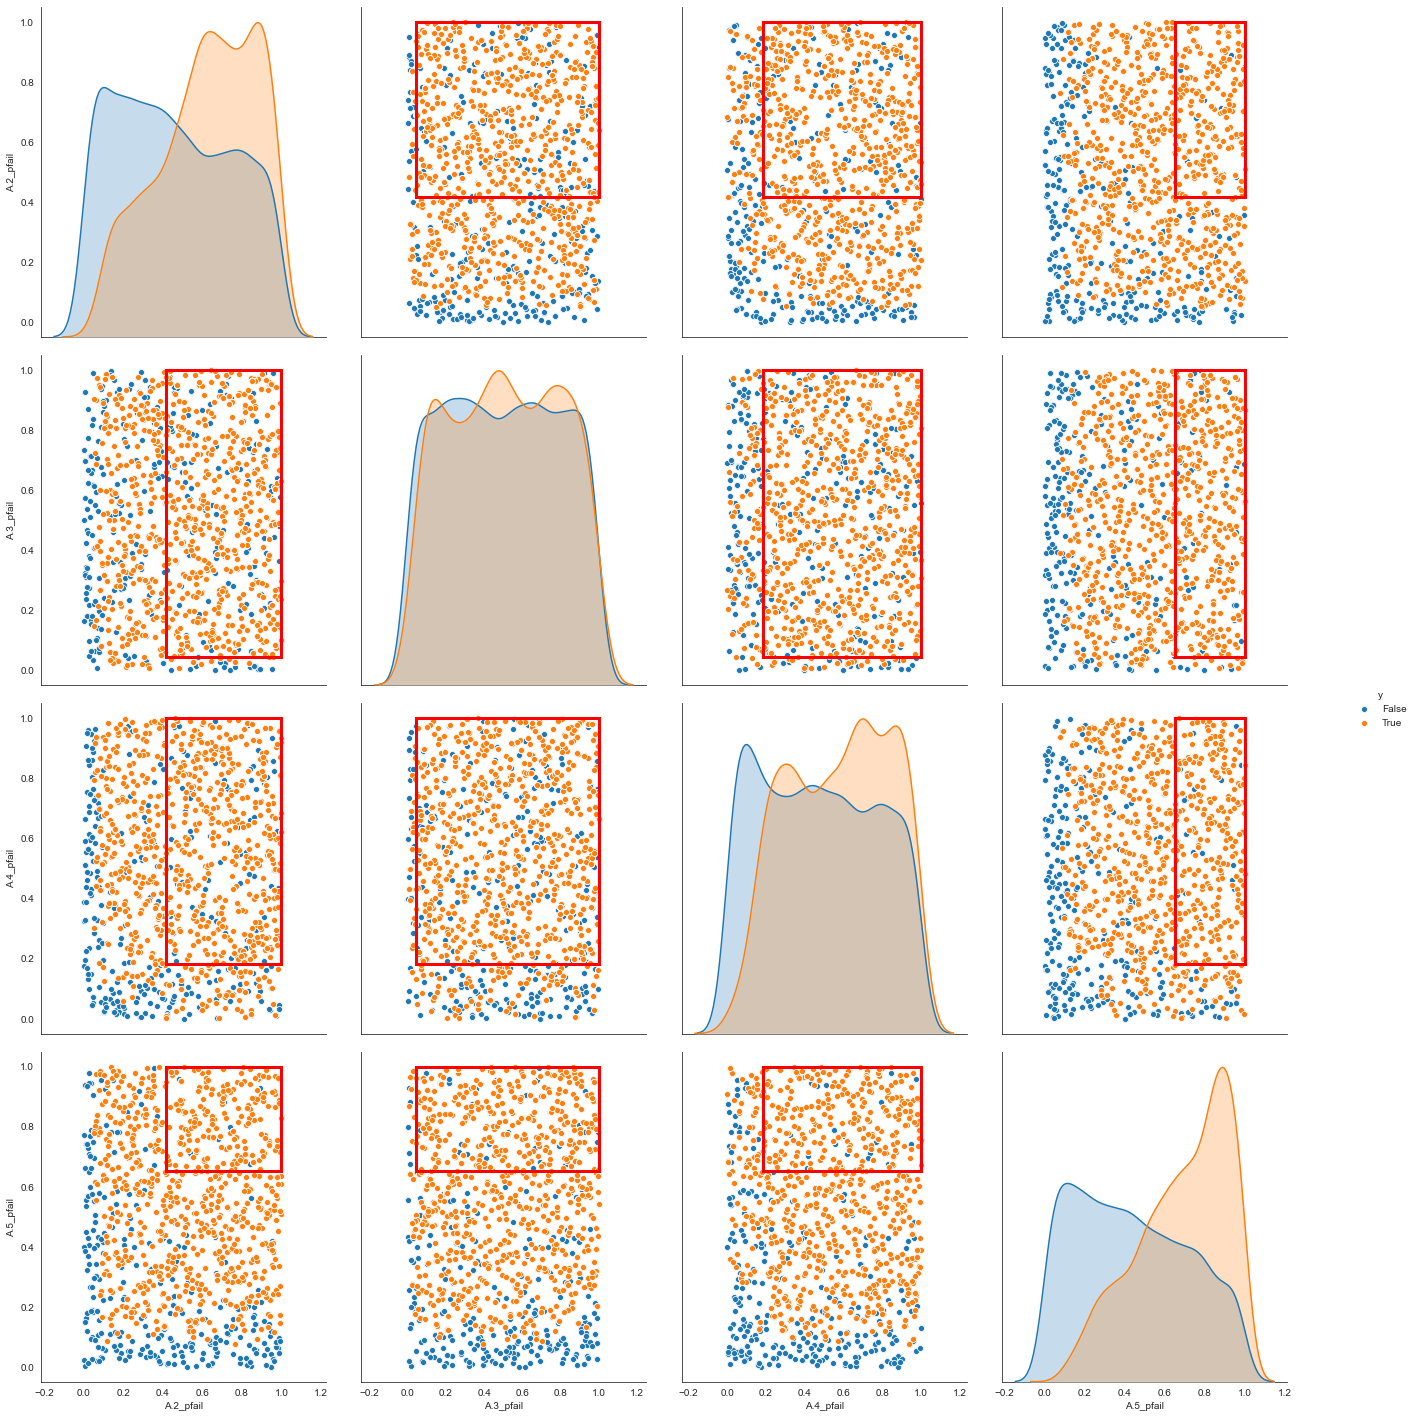

In [210]:
box2.select(35)
box2.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

#### Vizualize the results using dimensional stacking

In [216]:
from ema_workbench.analysis import dimensional_stacking

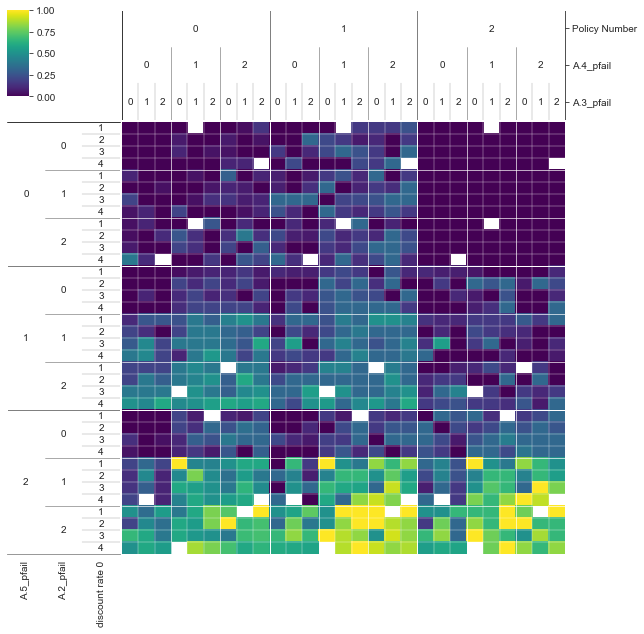

In [217]:
dimensional_stacking.create_pivot_plot(experiments_SD, y)
plt.show()